# fastMRI
Python 3.6+, Tensorflow 2.0.0-dev20190601

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, glob
import h5py # for loading .h5 files
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams["axes.grid"] = False # don't show grid lines on plots by default
plt.rcParams['figure.figsize'] = (12, 16) # increase size of subplots

In [4]:
import cs230_project_utilities as utils

In [38]:
# Sync data:
# aws s3 sync s3://cs230-automap/data/fastmri/raw/singlecoil_val data/fastmri/raw/singlecoil_dev # (val -> dev) 
# aws s3 sync s3://cs230-automap/data/fastmri/raw/singlecoil_test data/fastmri/raw/singlecoil_test
# aws s3 sync s3://cs230-automap/data/fastmri/raw/singlecoil_train data/fastmri/raw/singlecoil_train

In [58]:
# Prepare local directories

raw_dev_locations = '/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/*.h5'
raw_test_locations = '/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/*.h5'
raw_train_locations = '/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/*.h5'

dev_tfrecord_directory = '/home/ubuntu/cs230/data/fastmri/tfrecords/singlecoil_dev'
test_tfrecord_directory = '/home/ubuntu/cs230/data/fastmri/tfrecords/singlecoil_test'
train_tfrecord_directory = '/home/ubuntu/cs230/data/fastmri/tfrecords/singlecoil_train'

!mkdir -p $dev_tfrecord_directory
!mkdir -p $test_tfrecord_directory
!mkdir -p $train_tfrecord_directory

In [59]:
# Run conversion

utils.fastmri.convert_fastmri_dataset_to_tfrecord_files(raw_dev_locations,
                                                        dev_tfrecord_directory,
                                                        coils='single',
                                                        keep_original_reconstruction=True,
                                                        perform_subsampling=False)

Converting file 0 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001763.h5' to TFRecords...
Converting file 1 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000273.h5' to TFRecords...
Converting file 2 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001851.h5' to TFRecords...
Converting file 3 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000591.h5' to TFRecords...
Converting file 4 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001995.h5' to TFRecords...
Converting file 5 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001168.h5' to TFRecords...
Converting file 6 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1002538.h5' to TFRecords...
Converting file 7 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001480.h5' to TFRecords...
Converting file 8 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000196.h5' to TFRecords...
Converting file 9 at b'/home/ubuntu/cs230/data

Converting file 77 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001557.h5' to TFRecords...
Converting file 78 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000263.h5' to TFRecords...
Converting file 79 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000350.h5' to TFRecords...
Converting file 80 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1002380.h5' to TFRecords...
Converting file 81 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000292.h5' to TFRecords...
Converting file 82 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001338.h5' to TFRecords...
Converting file 83 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001331.h5' to TFRecords...
Converting file 84 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001650.h5' to TFRecords...
Converting file 85 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001148.h5' to TFRecords...
Converting file 86 at b'/home/ubuntu/

Converting file 154 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001104.h5' to TFRecords...
Converting file 155 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000831.h5' to TFRecords...
Converting file 156 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001365.h5' to TFRecords...
Converting file 157 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001057.h5' to TFRecords...
Converting file 158 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1000325.h5' to TFRecords...
Converting file 159 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001031.h5' to TFRecords...
Converting file 160 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001703.h5' to TFRecords...
Converting file 161 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001159.h5' to TFRecords...
Converting file 162 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_dev/file1001262.h5' to TFRecords...
Converting file 163 at b'/ho

In [60]:
utils.fastmri.convert_fastmri_dataset_to_tfrecord_files(raw_test_locations,
                                                        test_tfrecord_directory,
                                                        coils='single',
                                                        keep_original_reconstruction=False,
                                                        perform_subsampling=False)

Converting file 0 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1001135.h5' to TFRecords...
Converting file 1 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1001322.h5' to TFRecords...
Converting file 2 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1001400.h5' to TFRecords...
Converting file 3 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1002288.h5' to TFRecords...
Converting file 4 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1001662.h5' to TFRecords...
Converting file 5 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1002072.h5' to TFRecords...
Converting file 6 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1002504.h5' to TFRecords...
Converting file 7 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1000370.h5' to TFRecords...
Converting file 8 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1000670.h5' to TFRecords...
Converting file 9 at b'/home/ubuntu/c

Converting file 76 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1000681.h5' to TFRecords...
Converting file 77 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1002029.h5' to TFRecords...
Converting file 78 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1000251.h5' to TFRecords...
Converting file 79 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1000304.h5' to TFRecords...
Converting file 80 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1001442.h5' to TFRecords...
Converting file 81 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1002331.h5' to TFRecords...
Converting file 82 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1001389.h5' to TFRecords...
Converting file 83 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1002141.h5' to TFRecords...
Converting file 84 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_test/file1001072.h5' to TFRecords...
Converting file 85 at b'/hom

In [61]:
utils.fastmri.convert_fastmri_dataset_to_tfrecord_files(raw_train_locations,
                                                        train_tfrecord_directory,
                                                        coils='single',
                                                        keep_original_reconstruction=False,
                                                        perform_subsampling=False)

Converting file 0 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000814.h5' to TFRecords...
Converting file 1 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002359.h5' to TFRecords...
Converting file 2 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001856.h5' to TFRecords...
Converting file 3 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001062.h5' to TFRecords...
Converting file 4 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001206.h5' to TFRecords...
Converting file 5 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000846.h5' to TFRecords...
Converting file 6 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000324.h5' to TFRecords...
Converting file 7 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001378.h5' to TFRecords...
Converting file 8 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000510.h5' to TFRecords...
Converting file 9 at b'/home

Converting file 76 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000271.h5' to TFRecords...
Converting file 77 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000378.h5' to TFRecords...
Converting file 78 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001849.h5' to TFRecords...
Converting file 79 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001307.h5' to TFRecords...
Converting file 80 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002161.h5' to TFRecords...
Converting file 81 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001630.h5' to TFRecords...
Converting file 82 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000180.h5' to TFRecords...
Converting file 83 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001982.h5' to TFRecords...
Converting file 84 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000357.h5' to TFRecords...
Converting file 85 

Converting file 151 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000898.h5' to TFRecords...
Converting file 152 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001203.h5' to TFRecords...
Converting file 153 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001296.h5' to TFRecords...
Converting file 154 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001519.h5' to TFRecords...
Converting file 155 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001622.h5' to TFRecords...
Converting file 156 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001087.h5' to TFRecords...
Converting file 157 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002422.h5' to TFRecords...
Converting file 158 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000443.h5' to TFRecords...
Converting file 159 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001773.h5' to TFRecords...
Converting

Converting file 226 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001912.h5' to TFRecords...
Converting file 227 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001183.h5' to TFRecords...
Converting file 228 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002358.h5' to TFRecords...
Converting file 229 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000233.h5' to TFRecords...
Converting file 230 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001130.h5' to TFRecords...
Converting file 231 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000834.h5' to TFRecords...
Converting file 232 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000207.h5' to TFRecords...
Converting file 233 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000559.h5' to TFRecords...
Converting file 234 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001465.h5' to TFRecords...
Converting

Converting file 301 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002385.h5' to TFRecords...
Converting file 302 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000983.h5' to TFRecords...
Converting file 303 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001295.h5' to TFRecords...
Converting file 304 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001209.h5' to TFRecords...
Converting file 305 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001194.h5' to TFRecords...
Converting file 306 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002356.h5' to TFRecords...
Converting file 307 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002238.h5' to TFRecords...
Converting file 308 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002163.h5' to TFRecords...
Converting file 309 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002298.h5' to TFRecords...
Converting

Converting file 376 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001006.h5' to TFRecords...
Converting file 377 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000482.h5' to TFRecords...
Converting file 378 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002193.h5' to TFRecords...
Converting file 379 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001474.h5' to TFRecords...
Converting file 380 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001572.h5' to TFRecords...
Converting file 381 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001906.h5' to TFRecords...
Converting file 382 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000661.h5' to TFRecords...
Converting file 383 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002074.h5' to TFRecords...
Converting file 384 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000200.h5' to TFRecords...
Converting

Converting file 451 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002228.h5' to TFRecords...
Converting file 452 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000001.h5' to TFRecords...
Converting file 453 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002244.h5' to TFRecords...
Converting file 454 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002315.h5' to TFRecords...
Converting file 455 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000611.h5' to TFRecords...
Converting file 456 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000416.h5' to TFRecords...
Converting file 457 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000340.h5' to TFRecords...
Converting file 458 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001033.h5' to TFRecords...
Converting file 459 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001799.h5' to TFRecords...
Converting

Converting file 526 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001410.h5' to TFRecords...
Converting file 527 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000125.h5' to TFRecords...
Converting file 528 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002517.h5' to TFRecords...
Converting file 529 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000943.h5' to TFRecords...
Converting file 530 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000863.h5' to TFRecords...
Converting file 531 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000762.h5' to TFRecords...
Converting file 532 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001722.h5' to TFRecords...
Converting file 533 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001228.h5' to TFRecords...
Converting file 534 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002243.h5' to TFRecords...
Converting

Converting file 601 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001309.h5' to TFRecords...
Converting file 602 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001673.h5' to TFRecords...
Converting file 603 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002374.h5' to TFRecords...
Converting file 604 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000931.h5' to TFRecords...
Converting file 605 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001795.h5' to TFRecords...
Converting file 606 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001661.h5' to TFRecords...
Converting file 607 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001854.h5' to TFRecords...
Converting file 608 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001485.h5' to TFRecords...
Converting file 609 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000365.h5' to TFRecords...
Converting

Converting file 676 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002094.h5' to TFRecords...
Converting file 677 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002357.h5' to TFRecords...
Converting file 678 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001969.h5' to TFRecords...
Converting file 679 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000199.h5' to TFRecords...
Converting file 680 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001415.h5' to TFRecords...
Converting file 681 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000743.h5' to TFRecords...
Converting file 682 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001373.h5' to TFRecords...
Converting file 683 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000311.h5' to TFRecords...
Converting file 684 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001391.h5' to TFRecords...
Converting

Converting file 751 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000296.h5' to TFRecords...
Converting file 752 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000919.h5' to TFRecords...
Converting file 753 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002111.h5' to TFRecords...
Converting file 754 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002326.h5' to TFRecords...
Converting file 755 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002171.h5' to TFRecords...
Converting file 756 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000479.h5' to TFRecords...
Converting file 757 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000955.h5' to TFRecords...
Converting file 758 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000059.h5' to TFRecords...
Converting file 759 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000585.h5' to TFRecords...
Converting

Converting file 826 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002227.h5' to TFRecords...
Converting file 827 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000971.h5' to TFRecords...
Converting file 828 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000829.h5' to TFRecords...
Converting file 829 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001545.h5' to TFRecords...
Converting file 830 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000181.h5' to TFRecords...
Converting file 831 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001342.h5' to TFRecords...
Converting file 832 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000508.h5' to TFRecords...
Converting file 833 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000161.h5' to TFRecords...
Converting file 834 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000784.h5' to TFRecords...
Converting

Converting file 901 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001645.h5' to TFRecords...
Converting file 902 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000115.h5' to TFRecords...
Converting file 903 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000535.h5' to TFRecords...
Converting file 904 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000790.h5' to TFRecords...
Converting file 905 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1002520.h5' to TFRecords...
Converting file 906 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000434.h5' to TFRecords...
Converting file 907 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000400.h5' to TFRecords...
Converting file 908 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1000252.h5' to TFRecords...
Converting file 909 at b'/home/ubuntu/cs230/data/fastmri/raw/singlecoil_train/file1001470.h5' to TFRecords...
Converting

In [ ]:
# Sync TFRecords to s3
# aws s3 sync /home/ubuntu/cs230/data/fastmri/tfrecords/singlecoil_dev s3://cs230-automap/data/fastmri/tfrecords/singlecoil_dev
# aws s3 sync /home/ubuntu/cs230/data/fastmri/tfrecords/singlecoil_test s3://cs230-automap/data/fastmri/tfrecords/singlecoil_test
# aws s3 sync /home/ubuntu/cs230/data/fastmri/tfrecords/singlecoil_train s3://cs230-automap/data/fastmri/tfrecords/singlecoil_train

# Inspect dev data

In [62]:
# Load data

data_locations = os.path.join(dev_tfrecord_directory, 'shard-0.tfrecord')
dataset = utils.fastmri.load_dataset(data_locations,
                                     batch_size=8,
                                     shuffle_buffer_size=40,
                                     load_original_reconstruction=False,
                                     include_all_parsed_features=False,
                                     ignore_errors=True,
                                     perform_data_augmentation=False)

# Get first batch
batch = next(iter(dataset))
x, y = batch
x, y = x[0].numpy().squeeze(), y[0].numpy().squeeze()


# For visualization, combine 2 channels of complex tensor into single channel
x = utils.fastmri._combine_two_channels_of_complex_tensor(x).numpy()

x.shape, y.shape

Loading dataset... Shuffle items? True. Shuffle buffer: 40


((128, 128), (128, 128))

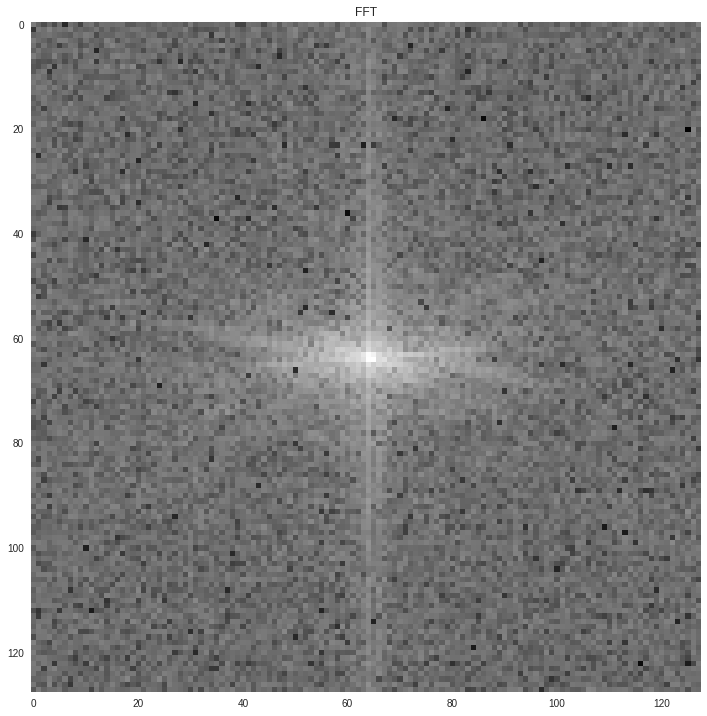

In [63]:
plt.title('FFT')
utils.plot.imshowfft(x)

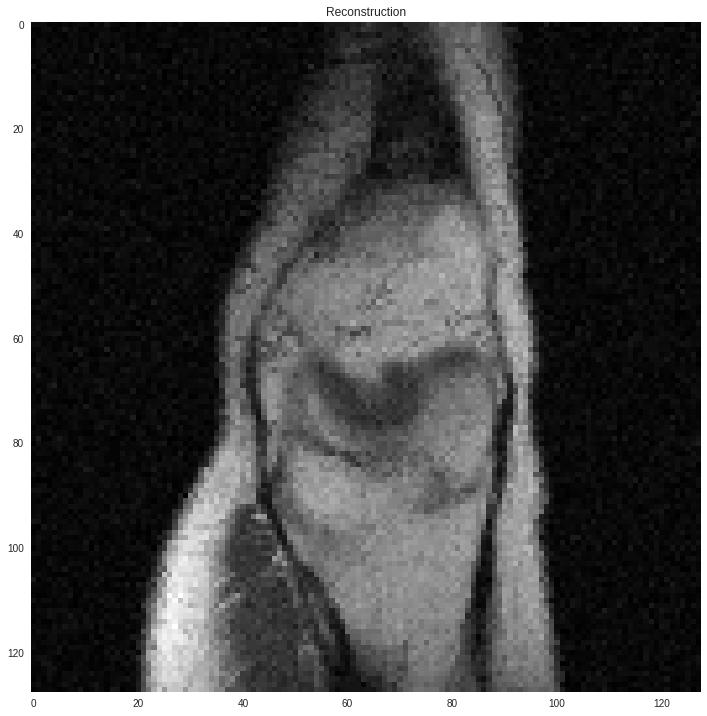

In [64]:
plt.title('Reconstruction')
utils.plot.imshowgray(y)

# Inspect test data

In [65]:
# Load data

data_locations = os.path.join(test_tfrecord_directory, 'shard-0.tfrecord')
dataset = utils.fastmri.load_dataset(data_locations,
                                     batch_size=8,
                                     shuffle_buffer_size=40,
                                     load_original_reconstruction=False,
                                     include_all_parsed_features=False,
                                     ignore_errors=True,
                                     perform_data_augmentation=False)

# Get first batch
batch = next(iter(dataset))
x, y = batch
x, y = x[0].numpy().squeeze(), y[0].numpy().squeeze()


# For visualization, combine 2 channels of complex tensor into single channel
x = utils.fastmri._combine_two_channels_of_complex_tensor(x).numpy()

x.shape, y.shape

Loading dataset... Shuffle items? True. Shuffle buffer: 40


((128, 128), (128, 128))

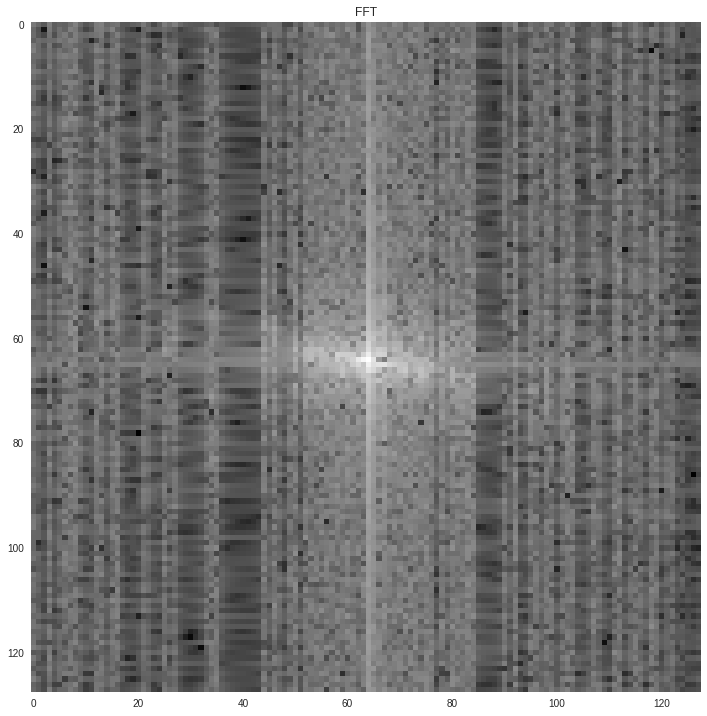

In [66]:
plt.title('FFT')
utils.plot.imshowfft(x)

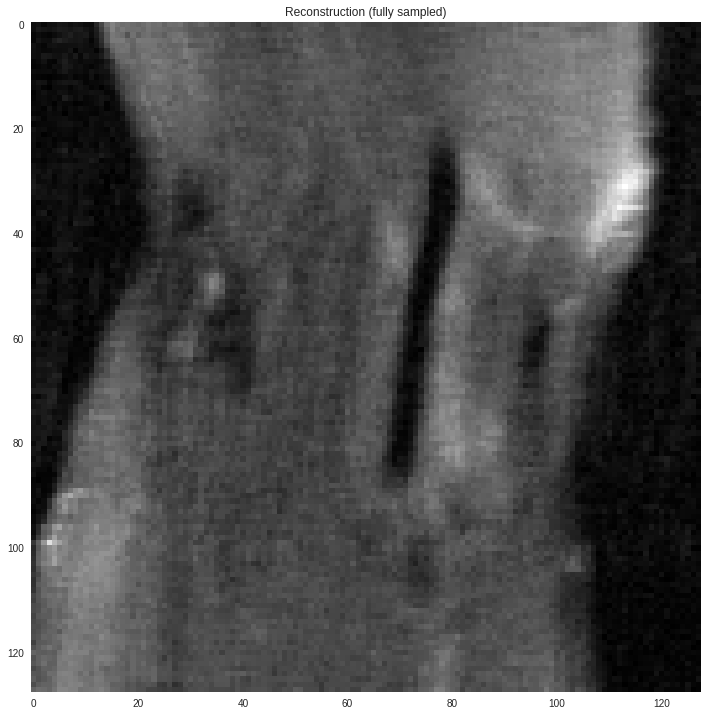

In [67]:
plt.title('Reconstruction (fully sampled)')
utils.plot.imshowgray(y)

# Inspect train data

In [80]:
# Load data

data_locations = os.path.join(train_tfrecord_directory, 'shard-0.tfrecord')
dataset = utils.fastmri.load_dataset(data_locations,
                                     batch_size=8,
                                     shuffle_buffer_size=40,
                                     load_original_reconstruction=False,
                                     include_all_parsed_features=False,
                                     ignore_errors=True,
                                     perform_data_augmentation=False)

# Get first batch
batch = next(iter(dataset))
x, y = batch
x, y = x[0].numpy().squeeze(), y[0].numpy().squeeze()


# For visualization, combine 2 channels of complex tensor into single channel
x = utils.fastmri._combine_two_channels_of_complex_tensor(x).numpy()

x.shape, y.shape

Loading dataset... Shuffle items? True. Shuffle buffer: 40


((128, 128), (128, 128))

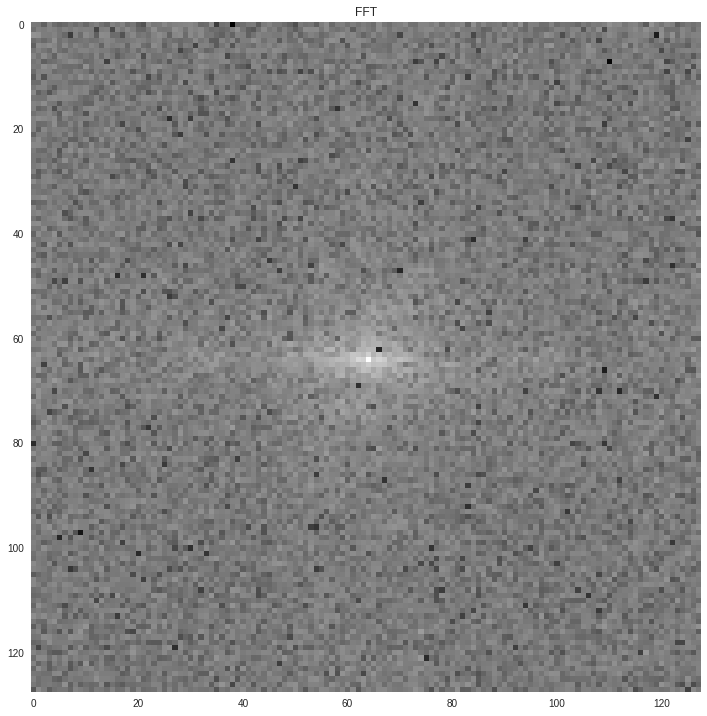

In [81]:
plt.title('FFT')
utils.plot.imshowfft(x)

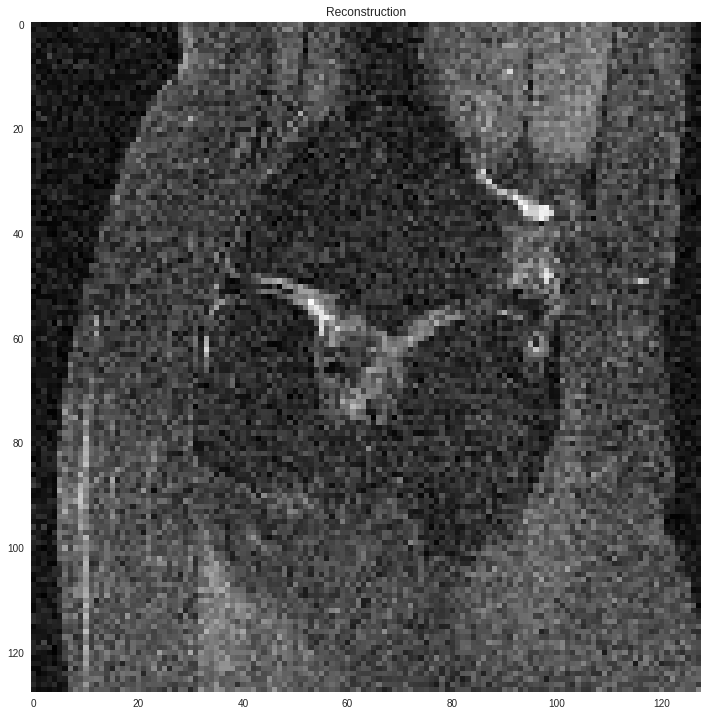

In [82]:
plt.title('Reconstruction')
utils.plot.imshowgray(y)